**Dataset**:

Use the breast cancer dataset available in the sklearn library.

**Key components to be fulfilled:**

***Loading and Preprocessing (2 marks):***

● Load the breast cancer dataset from sklearn.

● Preprocess the data to handle any missing values and perform necessary feature scaling.

● Explain the preprocessing steps you performed and justify why they are necessary for this dataset.

In [ ]:
#Loading the breast cancer dataset from sklearn.

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Features (X) and target (y)
X = data.data
y = data.target

# Feature names and target names
feature_names = data.feature_names
target_names = data.target_names

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Target names:", target_names)

Shape of X: (569, 30)
Shape of y: (569,)
Target names: ['malignant' 'benign']


**Objective**:

The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset.

In [ ]:
#Converting the sklearn dataset into a Pandas DataFrame.
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)

#Adding the target column to the DataFrame.
df['target'] = data.target

#Displaying dataset structure and checking for missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Preprocess the data to handle any missing values and perform necessary feature
scaling.

In [ ]:
#1. Handling Missing Values.
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

#2. Check for duplicate rows.
duplicate_rows = df[df.duplicated()]
print("\nNumber of duplicate rows:", duplicate_rows.shape[0])

#Display the duplicate rows if any.
if duplicate_rows.shape[0] > 0:
    print("\nDuplicate rows:\n", duplicate_rows)

#Remove duplicate rows to keep only unique rows.
df = df.drop_duplicates()

Missing values per column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Number of duplicate rows: 0


In [ ]:
#Detecting outliers.

Q1 = df.drop(columns='target').quantile(0.25)
Q3 = df.drop(columns='target').quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Counting the number of outliers in each feature
outlier_count = ((df.drop(columns='target') < lower_bound) |
                 (df.drop(columns='target') > upper_bound)).sum()

outlier_count

,0
mean radius,14
mean texture,7
mean perimeter,13
mean area,25
mean smoothness,6
mean compactness,16
mean concavity,18
mean concave points,10
mean symmetry,15
mean fractal dimension,15


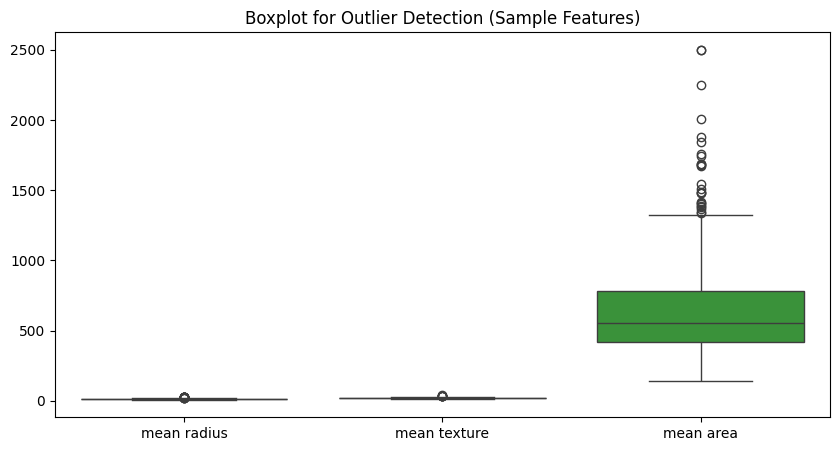

In [ ]:
#Detecting outliers using boxplot visualization.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['mean radius', 'mean texture', 'mean area']])
plt.title("Boxplot for Outlier Detection (Sample Features)")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separating features and target.
X = df.drop(columns='target')
y = df['target']

#Train-test split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Feature scaling using StandardScaler..
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Preprocessing Steps and Justification:-**

* **Handling Missing Values:**
    1. Checked for missing values using **df.isnull().sum**().
    2. **No missing values** were found in the features or target.
    3. **Justification**: Ensures machine learning algorithms can be applied without errors or biased predictions. No imputation was needed because the dataset is clean.
  
* **Handling Duplicate Rows:**

    1. Checked for duplicate rows using **df.duplicated()** and displayed them if any.

    2. **No duplicate rows** were found in the dataset.

    3. **Justification**: Removing duplicates ensures that the model does not learn redundant or repeated information, which could bias results or inflate performance metrics. Since the dataset had no duplicates, no rows were removed.

* **Outlier Detection:**
    1. Detected outliers using the **Interquartile Range (IQR)** method and visualized using **boxplots**.
    2. Some features showed extreme values, but **outliers were not removed**.
    3. **Justification**: In medical datasets, outliers often represent **genuine variations in tumor characteristics**. Removing them could lead to loss of important diagnostic information.
* **Train-Test Split:**
    1. Split the dataset into **training (80%) and testing (20%) sets** using **train_test_split**.
    2. Used **stratified sampling** to preserve the original class distribution.
    3. **Justification**: Ensures reliable evaluation on unseen data and prevents overfitting.
* **Feature Scaling:**
    1. Applied **StandardScaler** to scale the features.
    2. Scaling was done **after splitting** into train and test sets to avoid data leakage.
    3. Features have **different units and ranges**, so scaling ensures that all features contribute equally to model training. Essential for algorithms like **Logistic Regression, SVM, and k-NN** which are sensitive to feature magnitude.

* These preprocessing steps make the dataset **clean, unbiased, and suitable for classification modeling**, ensuring that the algorithms can learn effectively and predictions are reliable.
    

**Classification Algorithm Implementation (5 marks):**

**Implement the following five classification algorithms:**
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)
5. k-Nearest Neighbors (k-NN)

For each algorithm, provide a brief description of how it works and why it might be suitable for this dataset.

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Initializing Logistic Regression Model.
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

#Train the Logistic Regression model.
log_reg_model.fit(X_train_scaled, y_train)

#Make predictions on the test data.
y_pred = log_reg_model.predict(X_test_scaled)

#Evaluate Model Performance.

#Accuracy.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix.
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#Classification Report.
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  1]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



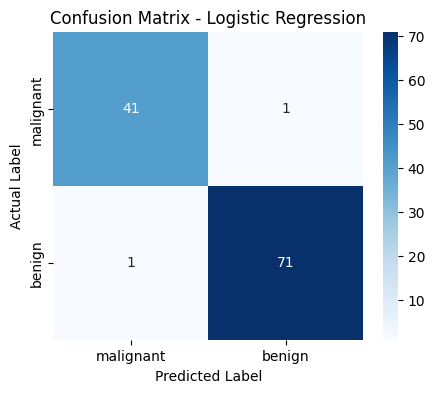

In [ ]:
#Visualizing the Confusion Matrix using a Heatmap.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Create heatmap.
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


**Explanation for Logistic Regression.**

* **Logistic Regression** is a supervised classification algorithm used to predict a **binary outcome** based on input features.
* In this implementation, the model is trained using the **scaled training data(X_train_scaled)** and the corresponding target values **(y_train)**.
* The algorithm works by learning a **linear combination of input features** and applying a **logistic (sigmoid) function** to convert the output into a probability value between **0 and 1**.
* Based on this probability, the model assigns each observation to one of the two classes:
Class labels follow the original dataset encoding provided by sklearn.
    1. **0 → Malignant**.
    2. **1 → Benign**.
* The **max_iter=1000** parameter ensures that the model has **sufficient iterations to converge**, especially because the dataset contains **multiple features**.
* **Feature scaling** using **StandardScaler** is essential for Logistic Regression, and it was correctly applied before training to ensure that all features contribute equally during model learning.

* **Evaluation metrics:**

    * **Accuracy** measures overall correctness of predictions.
    * **Confusion matrix** shows **true positives, true negatives, false positives, and false negatives**, giving insights into model performance.
    * **Classification report** provides **precision, recall, F1-score** for each class.

**Why Logistic Regression is Suitable for This Dataset.**

* The breast cancer dataset is a **binary classification problem**, making Logistic Regression an appropriate choice.
* All input features are **numerical and continuous**, which aligns well with the assumptions of Logistic Regression.
* The dataset has a **moderate number of features (30)**, allowing the model to learn patterns effectively without overfitting.
* Logistic Regression performs well when classes are **linearly separable**, which is reflected in the **high accuracy (98%)** obtained from the model.
* Provides **interpretable results** for medical context, making it easy to **explain predictions and feature impact**.

2. Decision Tree Classifier.

In [ ]:
#Importing Desicion Tree Classifier.

from sklearn.tree import DecisionTreeClassifier


#Initializing the model.
dt_model = DecisionTreeClassifier(random_state=42)

#Train the model.
dt_model.fit(X_train, y_train)

#Make Predictions.
y_pred_dt = dt_model.predict(X_test)

#Evaluate Model Performance.

#Accuracy.
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

#Confusion Matrix.
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)

#Classification Report.
cr_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", cr_dt)

Accuracy: 0.9122807017543859
Confusion Matrix:
 [[39  3]
 [ 7 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [ ]:
 #Control Overfitting.
dt_pruned = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
#Re-evaluate Pruned Model.
y_pred_pruned = dt_pruned.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_pruned))
cm_pruned = confusion_matrix(y_test, y_pred_pruned)
print("Confusion Matrix:\n", cm_pruned)
#Classification Report
print("Classification Report:\n",
      classification_report(y_test, y_pred_pruned))

Accuracy: 0.9210526315789473
Confusion Matrix:
 [[38  4]
 [ 5 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



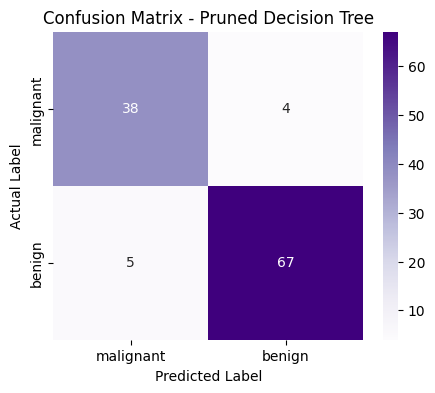

In [ ]:
#Visualizing confusion matrix for the pruned Decision Tree
plt.figure(figsize=(5,4))
sns.heatmap(cm_pruned, annot=True, fmt='d', cmap='Purples',
            xticklabels=target_names,
            yticklabels=target_names)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Pruned Decision Tree")
plt.show()

**Explanation for Decision Tree Classifier.**

* **Decision Tree Classifier** is a **supervised machine learning** algorithm used for classification tasks.
* It works by **splitting the dataset into subsets** based on feature values, creating a **tree-like structure** where each node represents a **decision rule** and each leaf represents a **class label**.
* The algorithm uses **feature importance** to decide **which feature to split on at each node**, aiming to **maximize class separatio**n.
* In the implementation:
    1. The model was **initialised with random_state=42** to ensure reproducible results.
    2. It was **trained on orginal training data (X_train**) and the corresponding target labels **(y_train)**.
    3. Predictions were made on the **test set (X_test)**.


* **Evaluation metrics:**

    * **Accuracy** measures overall correctness of predictions.
    * **Confusion matrix** shows **true positives, true negatives, false positives, and false negatives**, giving insights into model performance.
    * **Classification report** provides **precision, recall, F1-score** for each class.

* **Visualization:**
    * A **confusion matrix heatmap** is used to visually assess how well the model classified **malignant** and **benign** cases
    * This visualization clearly highlights correct and incorrect predictions for each class and is sufficient for evaluating classification performance.

**Pruning to Control Overfitting**

* Decision Trees are prone to **overfitting** when allowed to grow too deep.
* To address this, pre-pruning techniques were applied by limiting tree growth using parameters such as:
    * max_depth
    * min_samples_split
    * min_samples_leaf

* Pruning reduces model complexity and helps the tree generalize better to unseen data.
* After pruning, the model was **retrained and re-evaluated**, resulting in more balanced performance across both classes.
**Why Decision Tree is suitable for this dataset:**

* Handles **both numerical and continuous features** effectively.
* Can **capture non-linear relationships** between features and the target.
* Produces **interpretable rules**, which is valuable in a **medical dataset**.
* Performs well without requiring feature scaling.

* The Decision Tree Classifier achieved **approximately 92% accuracy**, demonstrating reliable classification performance.
* With pruning applied, the model becomes **more stable and less prone to overfitting**, making it suitable for medical classification tasks where interpretability and reliability are important.










3. Random Forest Classifier.

In [ ]:
#importing Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)


#Train the model.
rf_model.fit(X_train, y_train)

#Make Predictions.
y_pred_rf = rf_model.predict(X_test)

#Evaluate model performance.

#Accuracy.
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

#Confusion Matrix.
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

#Classification Report.
cr_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", cr_rf)

Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  3]
 [ 2 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



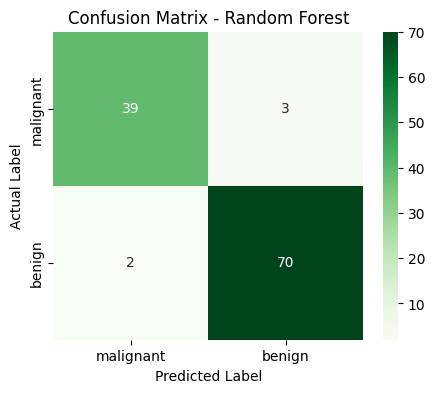

In [ ]:
#1. Confusion Matrix Heatmap.
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

**Explanation for Random Forest Classifier.**

* **Random Forest Classifier** is a **supervised machine learning** algorithm used for classification tasks.

* It works by building an **ensemble of multiple decision trees**, where each tree is trained on a different subset of the data and features. The final prediction is made by **majority voting** across all trees, which improves accuracy and reduces overfitting.

* The algorithm combines the predictions of many decision trees to produce a more stable and robust model compared to a single decision tree.

**In the implementation:**

1. The model was initialised with **n_estimators = 100**, meaning **100 decision trees** were used in the ensemble.

2. The parameter **random_state = 42** was set to ensure **reproducible results**.

3. The model was trained using the original training data (X_train), not scaled data, because Random Forest does not require feature scaling.
     
4. Predictions were generated on the orginal test data (**X_test**).

**Evaluation metrics:**

1. **Accuracy** measures the overall correctness of the model’s predictions.

2. **Confusion matrix** shows the number of true positives, true negatives, false positives, and false negatives, helping to understand classification errors.

3. Classification report provides **precision, recall, and F1-score** for each class, offering a detailed performance evaluation.

**Visualization:**

1. A **heatmap of the confusion matrix** visually represents how well the model classified malignant and benign cases.
**Why Random Forest is suitable for this dataset:**

1. Handles **numerical and continuous features** effectively, which matches the structure of the breast cancer dataset.

2. Can model complex and non-linear relationships between tumor features and the target class.

3. Reduces **overfitting** compared to a single decision tree by averaging results from multiple trees.
     
4. Provides **feature importance scores**, which are valuable in a medical dataset for understanding which tumor characteristics contribute most to predictions.

* Achieved **96% accuracy**, indicating strong and reliable performance on this dataset.

4. Support Vector Machine (SVM)

In [ ]:
#importing Support Vector Classifier.
from sklearn.svm import SVC

#Initialize the model.
svm_model = SVC(kernel='rbf', C=1, gamma='scale',random_state=42)

#Train the model.
svm_model.fit(X_train_scaled, y_train)

#Make Predictions.
y_pred_svm = svm_model.predict(X_test_scaled)

#Evaluate model performance.

#Accuracy.
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

#Confusion Matrix.
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", cm_svm)

#Classification Report.
cr_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", cr_svm)

Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  1]
 [ 1 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



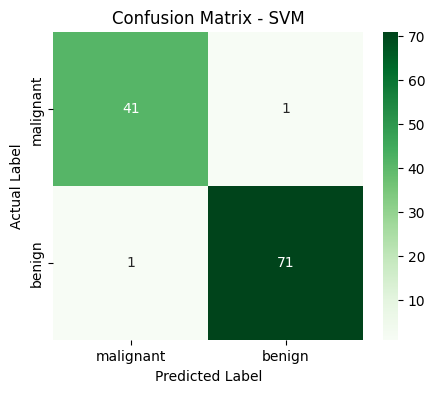

In [ ]:
#1. Confusion Matrix Heatmap.
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - SVM")
plt.show()

**Explanation for SVM.**

* **Support Vector Machine (SVM)** is a supervised machine learning algorithm used for **classification tasks**, particularly suitable for **binary classification** problems.

* It works by finding a **hyperplane** that best separates the two classes in the feature space, maximizing the **margin** between the nearest points of each class (support vectors).

**In the implementation:**

* The model was **initialized** with:
     1. kernel='rbf' → for **non-linear decision boundaries**.
     2. C=1 → **regularization parameter**, balancing misclassification and margin width.
     3. gamma='scale' → defines the **influence of each training sample**.
     4. random_state=42 → ensures **reproducible results**.
* The model was trained on **scaled training data (X_train_scaled)** and the corresponding target labels (y_train).
* Predictions were made on the **scaled test set (X_test_scaled)** to maintain consistency with training.

**Evaluation metrics:**
* **Accuracy** measures overall correctness of predictions. The model achieved **98% accuracy**, indicating very reliable performance.

* **Confusion matrix** shows **true positives, true negatives, false positives, and false negatives**, giving insights into model performance for each class.

* **Classification report** provides **precision, recall, and F1-score** for both classes.

**Visualization:**

* A **heatmap of the confusion matrix** helps visually assess how well the model classified malignant and benign cases.

**Why SVM is suitable for this dataset:**

* Handles **numerical and continuous features**, which is true for all 30 features in the breast cancer dataset.

* Can capture **non-linear relationships** between tumor features and the target class using the **RBF kernel**.

* Sensitive to feature scale, which is why **StandardScaler** was applied before training.

* Provides **high accuracy (98%)**, making it reliable for medical diagnosis tasks.

* Class labels follow the original dataset encoding provided by sklearn:

     1. **0 → Malignant**

     2. **1 → Benign**

5. k-Nearest Neighbors (k-NN)

In [ ]:
#importing k-Nearest Neighbors (k-NN).
from sklearn.neighbors import KNeighborsClassifier

#Initialize the model.
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='uniform')

#Train the model.
knn_model.fit(X_train_scaled, y_train)

#Make Predictions.
#Make Predictions.
y_pred_knn = knn_model.predict(X_test_scaled)

#Evaluate model performance.

#Accuracy.
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

#Confusion Matrix.
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)

#Classification Report.
cr_knn = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", cr_knn)

Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  3]
 [ 2 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



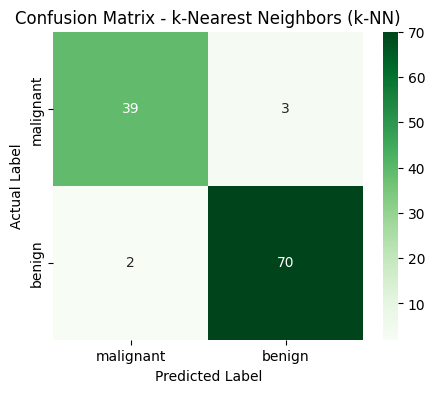

In [ ]:
#1. Confusion Matrix Heatmap.
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - k-Nearest Neighbors (k-NN)")
plt.show()

**Explanation for k-Nearest Neighbors (k-NN)**

* **k-Nearest Neighbors (k-NN)** is a supervised machine learning algorithm used for classification tasks.

**How it Works (based on the code):**

* k-NN classifies a new observation based on the **majority class of its k nearest neighbors** in the feature space.

In the code:

  1. **n_neighbors=5** → The 5 closest points are considered for deciding the class.

  2. **metric='minkowski'** → Distance metric used to calculate closeness between points.

  3. **weights='uniform'** → All neighbors have equal influence on the classification.

**In the Implementation:**

* The model was trained on **scaled training data** (X_train_scaled) and target labels (y_train).

* Predictions were made on the **scaled test data** (X_test_scaled) to ensure distances are meaningful.

**Evaluation Metrics:**

* **Accuracy**: Measures the proportion of correctly predicted observations; the model achieved **96% accuracy**.

* **Confusion Matrix**: Shows **true positives, true negatives, false positives, and false negatives**, providing insight into performance per class.

* **Classification Report**: Provides **precision, recall, and F1-score** for both classes, giving detailed evaluation.

**Visualization**:

* A **heatmap of the confusion matrix** is used to visually assess how well the model classified malignant and benign cases.

**Why k-NN is Suitable for This Dataset:**

* Works well with **numerical and continuous features**, which matches all 30 features of the breast cancer dataset.

* Captures **non-linear relationships** without assuming any functional form between features and target.

* **Sensitive to feature scale**, which is why **StandardScaler** was applied.


* Class labels follow the original dataset encoding:

     1. **0 → Malignant**

     2. **1 → Benign**

Compare the performance of the five classification algorithms.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

#Creating a DataFrame to compare all classification algorithms.
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Pruned Decision Tree",
              "Random Forest", "SVM (RBF)", "k-NN"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),        #Logistic Regression.
        accuracy_score(y_test, y_pred_dt),     #Decision Tree.
        accuracy_score(y_test, y_pred_pruned), #Pruned Decision Tree.
        accuracy_score(y_test, y_pred_rf),     #Random Forest.
        accuracy_score(y_test, y_pred_svm),    #SVM.
        accuracy_score(y_test, y_pred_knn)     #k-NN.
    ]
})

#Sort by accuracy in descending order.
comparison = comparison.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print(comparison)

#Best performing model.
best_accuracy = comparison['Accuracy'].max()
best_models = comparison[comparison['Accuracy'] == best_accuracy]['Model'].tolist()

#Worst performing model.
worst_accuracy = comparison['Accuracy'].min()
worst_models = comparison[comparison['Accuracy'] == worst_accuracy]['Model'].tolist()

#Print results.
print(f"Best Performing Algorithm(s) with Accuracy = {best_accuracy:.3f}: {', '.join(best_models)}")
print(f"Worst Performing Algorithm(s) with Accuracy = {worst_accuracy:.3f}: {', '.join(worst_models)}")


                  Model  Accuracy
0   Logistic Regression  0.982456
1             SVM (RBF)  0.982456
2                  k-NN  0.956140
3         Random Forest  0.956140
4  Pruned Decision Tree  0.921053
5         Decision Tree  0.912281
Best Performing Algorithm(s) with Accuracy = 0.982: Logistic Regression, SVM (RBF)
Worst Performing Algorithm(s) with Accuracy = 0.912: Decision Tree


**Explanation for Best-Performing Algorithm:**

**Logistic Regression and Support Vector Machine (SVM - RBF Kernel)**

* **Accuracy: 0.982 (Highest among all models)**

**Explanation and Justification:**

* Logistic Regression and Support Vector Machine (SVM) achieved the **highest and equal accuracy**, making them the **best-performing models** for this dataset.

* **Logistic Regression** works by learning a linear relationship between the input features and the target variable and then applying a sigmoid function to estimate class probabilities.

* Because the breast cancer dataset contains well-structured numerical features and relatively clear separation between malignant and benign tumors, Logistic Regression performs exceptionally well.

* **Support Vector Machine (SVM)** with an RBF kernel works by finding an optimal hyperplane that maximizes the margin between the two classes. The RBF kernel allows the model to capture **non-linear boundaries**, which further improves classification performance.

**Why These Models Performed Best:**

* The dataset is **binary and well-separated**, which suits both Logistic Regression and SVM.

* All features were **properly scaled using StandardScaler**, which is critical for both models.

* Both models generalize well and are **less prone to overfitting** on this dataset.

* High accuracy and balanced confusion matrices indicate **strong performance on both malignant and benign cases**.

**Conclusion:**

* Logistic Regression and SVM are the **best-performing algorithms** because they deliver **high accuracy, stable predictions, and strong generalization**, making them highly reliable for medical classification tasks like breast cancer diagnosis.

**Explanation for Worst-Performing Algorithm:**

**Decision Tree Classifier (Without Pruning)**

**Accuracy: 0.912 (Lowest among all models)**

**Explanation and Reasoning:**

* The **unpruned Decision Tree Classifier** achieved the **lowest accurac**y among all implemented classification models.

* A Decision Tree works by repeatedly splitting the dataset based on feature values to create a tree-like structure of decision rules. When no pruning constraints are applied, the tree continues to grow until it perfectly fits the training data.

**Why This Model Performed Worst:**

* **Lack of pruning** allowed the tree to grow very deep, causing it to **overfit** the training data.

* The model learned noise and minor variations instead of general patterns.

* Overfitting resulted in **reduced generalization performance** on unseen test data.

* This is reflected in the **lower test accuracy (0.912)** compared to all other models.

**Supporting Observations:**

* The confusion matrix shows a **higher number of misclassifications** compared to pruned and ensemble models.

* Although Decision Trees are **interpretable, interpretability alone does not guarantee performance**.

* The model does not benefit from feature scaling and relies heavily on optimal split selection, making it sensitive to data variations.

**Conclusion:**

* The **unpruned Decision Tree Classifier** is the **worst-performing model** because its unrestricted growth leads to **overfitting**, which negatively impacts its ability to generalize to new data. While pruning improves performance and stability, the unpruned version fails to match the accuracy and robustness of other classifiers used in this assessment.